In [1]:
import pickle 
import numpy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def rolling(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [3]:
cyc_dmala_energies = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr/energies.pickle", "rb"))
cyc_dmala_hops = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr/hops.pickle", "rb"))
cyc_dmala_a_s = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr/a_s.pickle", "rb"))

cyc_dmala_burnin_energies = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr_adapt_burnin_lr_0.5/energies.pickle", "rb"))
cyc_dmala_burnin_hops = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr_adapt_burnin_lr_0.5/hops.pickle", "rb"))
cyc_dmala_burnin_a_s = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr_adapt_burnin_lr_0.5/a_s.pickle", "rb"))

cyc_dula_burnin_energies = pickle.load(open("figs/ebm_sample/cyc_dula_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin_lr_0.9/energies.pickle", "rb"))
cyc_dula_burnin_hops = pickle.load(open("figs/ebm_sample/cyc_dula_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin_lr_0.9/hops.pickle", "rb"))


dmala_energies = pickle.load(open("figs/ebm_sample/dmala_stepsize_0.2_0.5/energies.pickle", "rb"))
dmala_hops = pickle.load(open("figs/ebm_sample/dmala_stepsize_0.2_0.5/hops.pickle", "rb"))

dula_energies = pickle.load(open("figs/ebm_sample/dula_stepsize_0.1_0.5/energies.pickle", "rb"))
dula_hops = pickle.load(open("figs/ebm_sample/dula_stepsize_0.1_0.5/hops.pickle", "rb"))

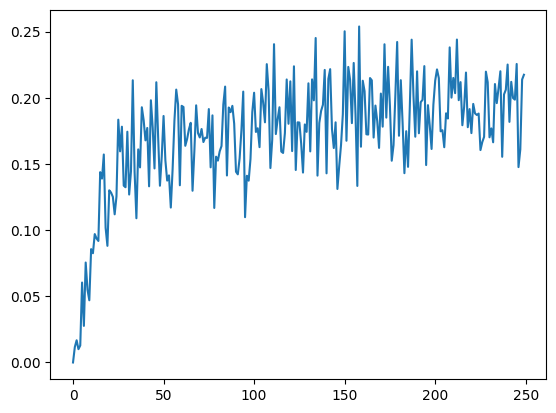

In [4]:
a_s_means = [cyc_dmala_a_s[(i)*20 + 0] for i in range(250)]
plt.plot(a_s_means)

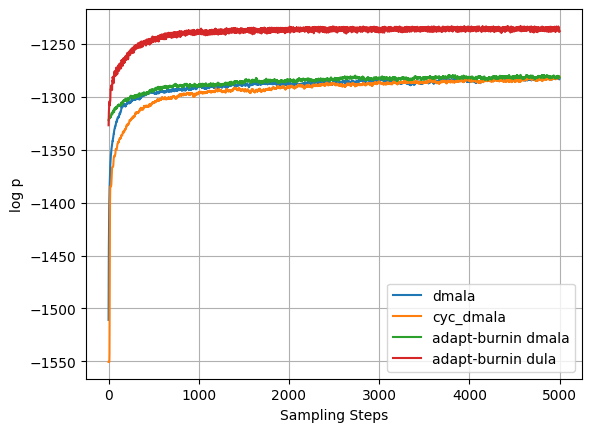

In [5]:
plt.plot(dmala_energies, label="dmala")
plt.plot(cyc_dmala_energies, label="cyc_dmala")
plt.plot(cyc_dmala_burnin_energies, label="adapt-burnin dmala")
plt.plot(cyc_dula_burnin_energies, label="adapt-burnin dula")
plt.ylabel("log p")
plt.xlabel("Sampling Steps")
plt.grid()
plt.legend()



Text(0.5, 1.0, 'Adaptive Increases Hops, step idx = 0')

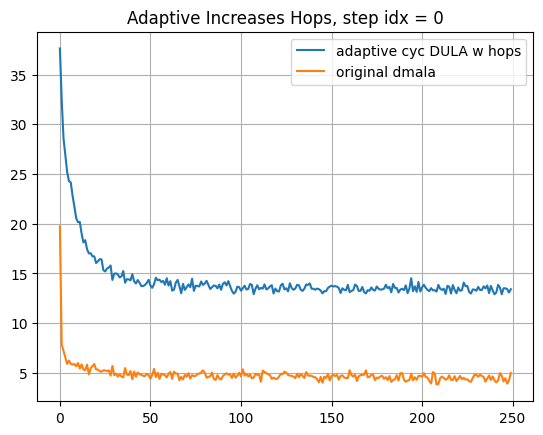

In [6]:
step_num = 0
plt.plot(cyc_dula_burnin_hops[step_num::20], label='adaptive cyc DULA w hops')
plt.plot(dmala_hops[step_num::20], label='original dmala')
plt.legend()
plt.grid()
plt.title(f"Adaptive Increases Hops, step idx = {step_num}")

Text(0.5, 1.0, 'Adaptive Increases Hops, step idx = 18')

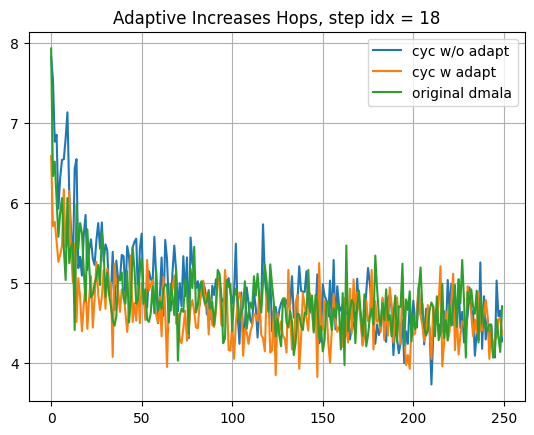

In [7]:
step_num = 18
plt.plot(cyc_dmala_hops[step_num::20], label='cyc w/o adapt')
plt.plot()
plt.plot(cyc_dmala_burnin_hops[step_num::20], label='cyc w adapt')
plt.plot(dmala_hops[step_num::20], label='original dmala')
plt.legend()
plt.grid()
plt.title(f"Adaptive Increases Hops, step idx = {step_num}")

In [8]:
# calculating average hops per cycle 
total_hops = []
for hops in [cyc_dmala_hops, cyc_dmala_burnin_hops, dmala_hops]:
    temp_hops = []
    for i in range(len(cyc_dmala_hops) // 20): 
        h_mean = np.mean(hops[(i) * 20 : (i + 1)*20])
        temp_hops.append(h_mean)
    total_hops.append(temp_hops)
        

Text(0.5, 0, 'cycle number')

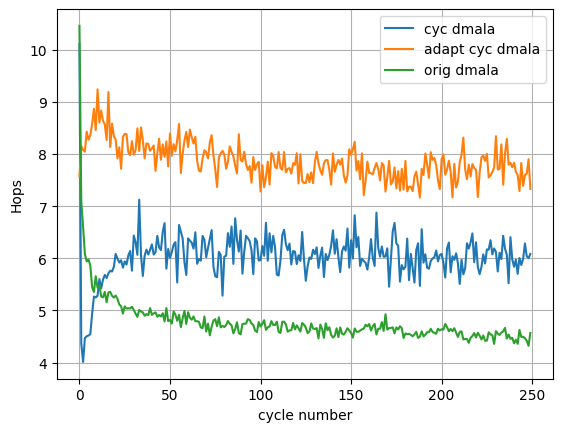

In [9]:
temp_names = ['cyc dmala', 'adapt cyc dmala', 'orig dmala']
for i, hops in enumerate(total_hops):
    plt.plot(hops, label=temp_names[i])
plt.legend()
plt.grid()
plt.ylabel("Hops")
plt.xlabel("cycle number")

In [10]:
cyc_dmala_energies = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin/energies.pickle", "rb"))
cyc_dmala_hops = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin/hops.pickle", "rb"))
cyc_dmala_a_s = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin/a_s.pickle", "rb"))



In [13]:
burnin_res = pickle.load(open("figs/ebm_sample_zeroinit/cyc_dmala_cycles_250_alpha_max_budget_500_lr_0.1_adapt_burnin_lr_0.1/burnin_res.pickle", "rb"))

In [14]:
burnin_res

{'step-adapt-hist': {'a_s': [0.9986966013908386],
  'hops': [0.01171875],
  'alpha_max': [19.20502017702663]},
 'bal-adapt-hist': {'a_s': [0.9988633751869201,
   0.9907429456710816,
   0.988166230916977,
   0.9848456740379333],
  'hops': [0.00234375, 0.009375, 0.009375, 0.0109375]}}

In [76]:
cyc_dula_burnin_energies = pickle.load(open("figs/ebm_sample/cyc_dula_cycles_100_stepsize_2.0_initbal_1.0_adapt_burnin_lr_0.9/energies.pickle", "rb"))
cyc_dula_burnin_hops = pickle.load(open("figs/ebm_sample/cyc_dula_cycles_100_stepsize_2.0_initbal_1.0_adapt_burnin_lr_0.9/hops.pickle", "rb"))


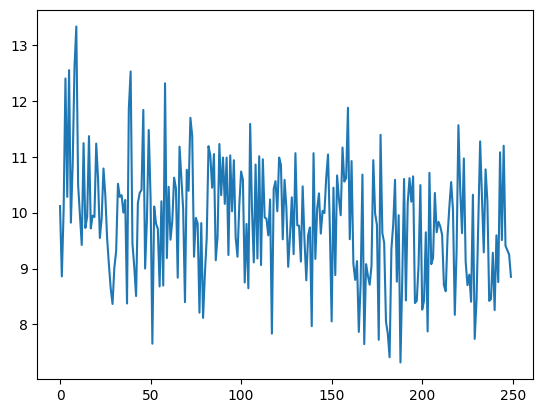

In [75]:
plt.plot(cyc_dmala_burnin_hops[0::20])

In [70]:
cyc_dula_burnin_res = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin_lr_0.5/burnin_res.pickle", "rb"))
cyc_dula_burnin_res

{'step-adapt-hist': {'a_s': [3.6250897344645897e-09,
   1.9941778029887714e-09,
   1.0908625095528655e-08,
   0.00011624304273465161,
   1.29679554145394e-08,
   2.170343103464319e-09,
   3.1237372323862893e-10,
   8.80882484207744e-09,
   4.4296826705425735e-10,
   6.089875886740374e-09,
   2.1380362098908077e-12,
   5.351466200499795e-12,
   9.082919674369807e-11,
   1.2699254240457137e-11,
   1.3463605222967676e-11,
   1.904810376187067e-11,
   1.7768719462084734e-09,
   9.962799619665012e-11,
   1.0042727125638275e-10,
   3.771499555928606e-11,
   1.2777268873827831e-11,
   1.1761331641541983e-11,
   8.01346908157279e-15,
   2.0412709639109278e-15,
   1.5838970785948534e-13],
  'hops': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  'alpha_max': [13.85929291125633,
   9.701505063000024,
   6.79105355377328,
   4.753737524681824,
  

In [81]:
digit_energies = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr_adapt_burnin_lr_0.9/digit_energies.pickle", "rb"))

Text(0.5, 0, 'Digits')

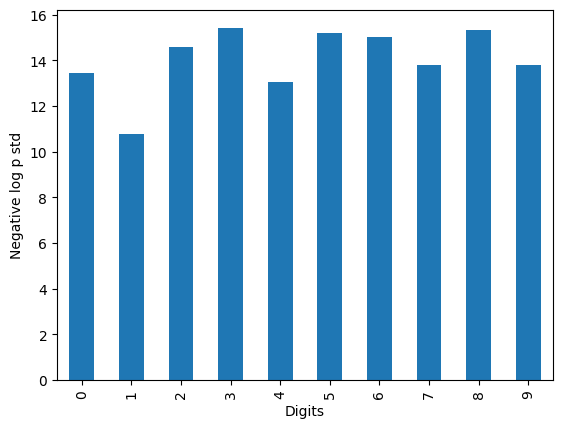

In [143]:
import pandas as pd
summary_df = pd.DataFrame()
df = pd.DataFrame(digit_energies)
summary_df['Log p mean'] = df.groupby('values').apply('mean')
summary_df['Log p std'] = df.groupby('values').apply('std')
graph = (summary_df['Log p std']).plot.bar()
graph.set_ylim(0)
graph.set_ylabel("Negative log p std")
graph.set_xlabel("Digits")

# graph.legend()
# graph.grid()
# graph

<Axes: xlabel='values'>

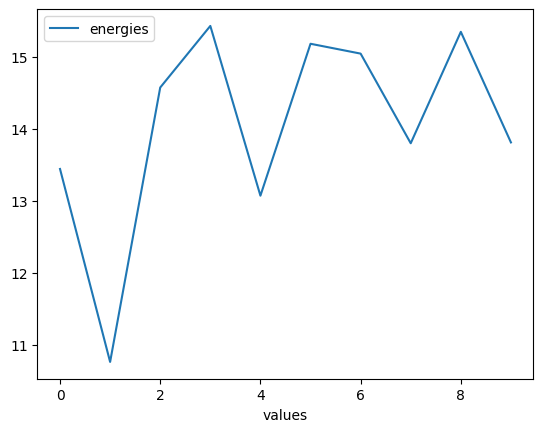

In [111]:
df.groupby('values').apply('std').plot()

In [96]:
sample_var1 = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_min_lr_adapt_burnin_lr_0.5/sample_var.pickle", "rb"))

In [97]:
sample_var2 = pickle.load(open("figs/ebm_sample/dmala_stepsize_0.2_0.5/sample_var.pickle", "rb"))

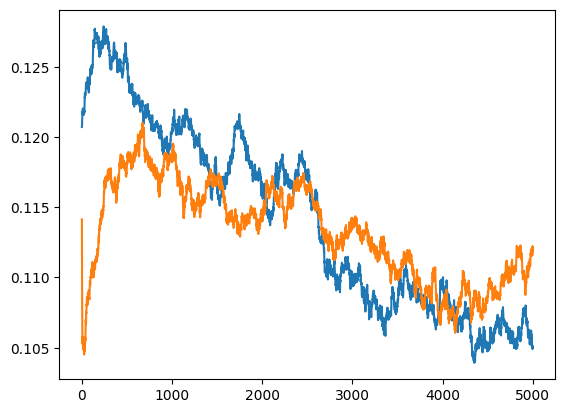

In [98]:
plt.plot(sample_var1, label="acdlp")
plt.plot(sample_var2, label="dlp")


In [155]:
step_size = 1.0
bal = .7
np.mean(pickle.load(open(f"figs/ebm_sample/dmala_stepsize_{str(step_size)}_{str(bal)}/a_s.pickle", "rb")))

0.3180866759832948

In [19]:
burnin_50 = pickle.load(open("figs/rbm_sample_res/rbm_iter_50/cyc_dmala_cycles_250_alpha_max_budget_1000_lr_0.5/burnin_res.pickle", "rb"))
burnin_1 = pickle.load(open("figs/rbm_sample_res/rbm_iter_1/cyc_dmala_cycles_250_alpha_max_budget_1000_lr_0.5/burnin_res.pickle", "rb"))


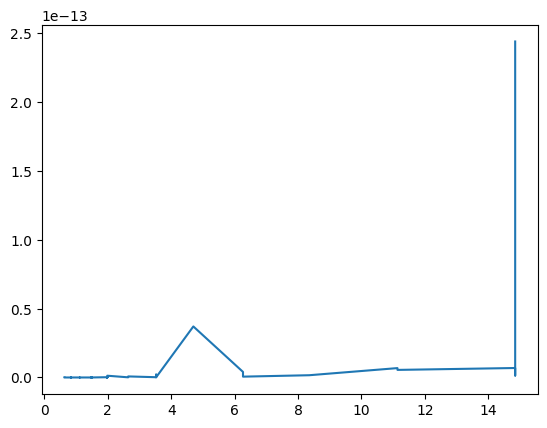

In [28]:
plt.plot(burnin_50["step-adapt-hist"]['alpha_max'], burnin_50["step-adapt-hist"]['a_s'])

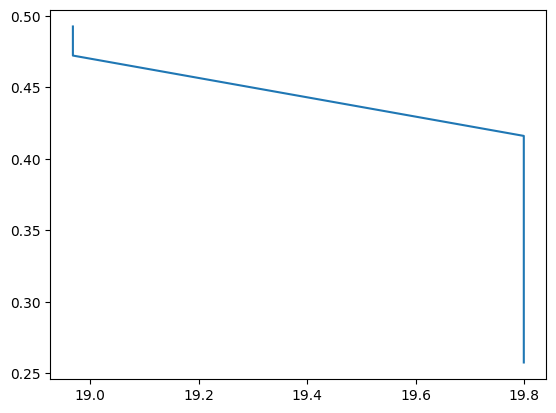

In [27]:
plt.plot(burnin_1["step-adapt-hist"]['alpha_max'], burnin_1["step-adapt-hist"]['a_s'])

In [29]:
fn = "figs/rbm_sample_res/zeroinit_False/rbm_iter_50/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0/a_s.pickle"
cdmala_as_50 = pickle.load(open(fn, "rb"))

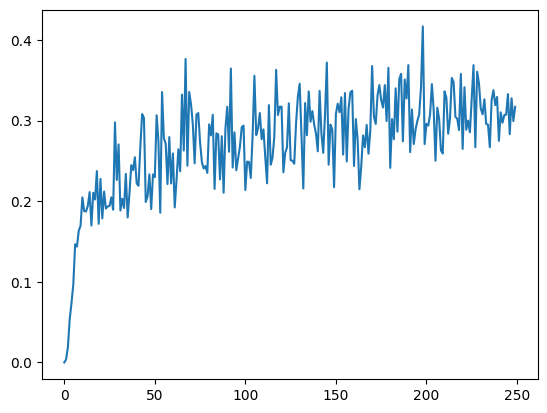

In [61]:
plt.plot(cdmala_as_50[0::20])

In [98]:
fn = "figs/rbm_sample_res/zeroinit_False/rbm_iter_50/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0/log_mmds.pickle"
cdmala_hops_50 = pickle.load(open(fn, "rb"))

In [99]:
fn = "figs/rbm_sample_res/zeroinit_False/rbm_iter_50/dmala_stepsize_0.2_0.5/log_mmds.pickle"
dmala_hops_50 = pickle.load(open(fn, "rb"))

In [100]:
cdmala_hops_50

[-3.6721975803375244,
 -3.622546434402466,
 -3.0922348499298096,
 -3.081908702850342,
 -3.0404515266418457,
 -3.0364081859588623,
 -3.0316715240478516,
 -3.031073808670044,
 -3.0194733142852783,
 -3.019881010055542,
 -3.002265691757202,
 -3.0044713020324707,
 -2.986610174179077,
 -2.9831998348236084,
 -2.987276554107666,
 -2.99756121635437,
 -2.988535165786743,
 -2.9936587810516357,
 -3.00490665435791,
 -3.0158932209014893,
 -3.008816957473755,
 -3.0092084407806396,
 -2.9959335327148438,
 -3.0145342350006104,
 -3.021778106689453,
 -2.992790699005127,
 -3.0080299377441406,
 -3.025691509246826,
 -3.0364654064178467,
 -3.0298714637756348,
 -3.039579391479492,
 -3.05251145362854,
 -3.063615560531616,
 -3.0827796459198,
 -3.1090540885925293,
 -3.106778860092163,
 -3.1613240242004395,
 -3.144885301589966,
 -3.133976697921753,
 -3.1451148986816406,
 -3.1585986614227295,
 -3.168405532836914,
 -3.1832754611968994,
 -3.1869750022888184,
 -3.1947035789489746,
 -3.192117929458618,
 -3.193903923034

In [101]:
dmala_hops_50

[-3.606741428375244,
 -3.317319393157959,
 -3.2872133255004883,
 -3.261744260787964,
 -3.2825493812561035,
 -3.2640583515167236,
 -3.241086006164551,
 -3.2591750621795654,
 -3.278188467025757,
 -3.2976672649383545,
 -3.2978835105895996,
 -3.3146984577178955,
 -3.3075084686279297,
 -3.3077104091644287,
 -3.2866392135620117,
 -3.3159260749816895,
 -3.3356924057006836,
 -3.3335578441619873,
 -3.3400697708129883,
 -3.350019931793213,
 -3.3474817276000977,
 -3.3440542221069336,
 -3.358900547027588,
 -3.362025022506714,
 -3.372993230819702,
 -3.3837172985076904,
 -3.401470184326172,
 -3.3999223709106445,
 -3.417996883392334,
 -3.4258615970611572,
 -3.4278650283813477,
 -3.4668619632720947,
 -3.471209764480591,
 -3.4664647579193115,
 -3.4651753902435303,
 -3.500011920928955,
 -3.5079307556152344,
 -3.4992856979370117,
 -3.521233320236206,
 -3.5236356258392334,
 -3.5463287830352783,
 -3.5558969974517822,
 -3.545973300933838,
 -3.5690114498138428,
 -3.5511906147003174,
 -3.569993257522583,
 -3.

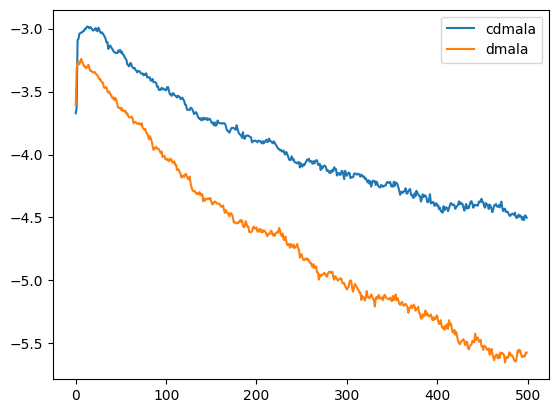

In [102]:
plt.plot(cdmala_hops_50, label = "cdmala")
plt.plot(dmala_hops_50, label="dmala")
plt.legend()

In [103]:
fn = "figs/ebm_sample_zero/zeroinit_True/cyc_dula_cycles_250_stepsize_2.0_initbal_1.0/hops.pickle"
hops_dula_zero_init = pickle.load(open(fn, "rb"))

In [104]:
hops_dula_zero_init

[0.0,
 0.0234375,
 0.0234375,
 0.0,
 0.0,
 0.0078125,
 0.015625,
 0.03125,
 0.0546875,
 0.078125,
 0.0859375,
 0.1015625,
 0.1171875,
 0.1171875,
 0.1328125,
 0.1796875,
 0.1953125,
 0.0859375,
 0.0,
 0.0,
 0.1171875,
 0.0546875,
 0.046875,
 0.0390625,
 0.0625,
 0.0546875,
 0.0703125,
 0.0390625,
 0.0703125,
 0.1015625,
 0.125,
 0.1875,
 0.2421875,
 0.25,
 0.2890625,
 0.328125,
 0.328125,
 0.1484375,
 0.0078125,
 0.0,
 0.1640625,
 0.109375,
 0.140625,
 0.15625,
 0.203125,
 0.140625,
 0.1875,
 0.1953125,
 0.1875,
 0.2265625,
 0.2109375,
 0.203125,
 0.2578125,
 0.359375,
 0.4375,
 0.3515625,
 0.2265625,
 0.1015625,
 0.0234375,
 0.0,
 0.21875,
 0.1875,
 0.15625,
 0.1328125,
 0.203125,
 0.1953125,
 0.1875,
 0.25,
 0.2109375,
 0.25,
 0.3046875,
 0.34375,
 0.2890625,
 0.3984375,
 0.421875,
 0.421875,
 0.3359375,
 0.1484375,
 0.046875,
 0.0,
 0.3828125,
 0.3203125,
 0.2421875,
 0.171875,
 0.2421875,
 0.2421875,
 0.234375,
 0.203125,
 0.3046875,
 0.3359375,
 0.3125,
 0.390625,
 0.453125,
 0.47